# Event and trapping horizons in Vaidya spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)

These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (version 1.0, as included in SageMath 7.5 and higher versions)

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/Vaidya.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet: 

In [1]:
version()

'SageMath version 8.0.beta6, Release Date: 2017-05-12'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


We use coordinates $(t,r,\theta,\phi)$ analogous to the 3+1 Eddington-Finkelstein coordinates in Schwarzschild spacetime, i.e. coordinates such that the advanced time $v = t+r$ is constant on the ingoing radial null geodesics:

In [4]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In [5]:
X.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

## Metric tensor

The metric tensor corresponding to the Vaidya solution is:

In [6]:
m = function('m')
g = M.lorentzian_metric('g')
g[0,0] = -(1-2*m(t+r)/r)
g[0,1] = 2*m(t+r)/r
g[1,1] = 1+2*m(t+r)/r
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*m(r + t)/r - 1) dt*dt + 2*m(r + t)/r dt*dr + 2*m(r + t)/r dr*dt + (2*m(r + t)/r + 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

## Einstein equation

Let us compute the Ricci tensor associated with the metric $g$:

In [7]:
Ric = g.ricci()
Ric.display()

Ric(g) = 2*d(m)/d(r + t)/r^2 dt*dt + 2*d(m)/d(r + t)/r^2 dt*dr + 2*d(m)/d(r + t)/r^2 dr*dt + 2*d(m)/d(r + t)/r^2 dr*dr

The notation $\frac{\partial m}{\partial(r+t)}$ to denote $\frac{\mathrm{d}m}{\mathrm{d}v}$ is quite unfortunate (this shall be improved in a future version). The display of the corresponding symbolic expression is slightly better:

In [8]:
Ric[0,0].expr()

2*D[0](m)(r + t)/r^2

The Ricci scalar is vanishing:

In [9]:
g.ricci_scalar().display()

r(g): M --> R
   (t, r, th, ph) |--> 0

The energy-momentum vector ensuring that the Einstein equation is fulfilled is then:

In [10]:
T = 1/(8*pi)*Ric
T.display()

1/4*d(m)/d(r + t)/(pi*r^2) dt*dt + 1/4*d(m)/d(r + t)/(pi*r^2) dt*dr + 1/4*d(m)/d(r + t)/(pi*r^2) dr*dt + 1/4*d(m)/d(r + t)/(pi*r^2) dr*dr

Since $v=t+r$, we have $\mathrm{d}v = \mathrm{d}t + \mathrm{d}r$:

In [11]:
dv = M.scalar_field({X: t+r}, name='v').differential()
dv.display()

dv = dt + dr

The derivative of the function $m(v)$:

In [12]:
v = var('v')
mp(v) = diff(m(v),v)
mp(v)

diff(m(v), v)

In [13]:
T == 1/(4*pi)*mp(t+r)/r^2 * dv*dv

True

The future-directed null vector along the ingoing null geodesics:

In [14]:
ks = -dv.up(g)
print(ks)
ks.display()

Vector field on the 4-dimensional differentiable manifold M


d/dt - d/dr

In [15]:
g(ks,ks).display()

M --> R
(t, r, th, ph) |--> 0

## Outgoing radial null geodesics

Let us consider the vector field:

In [16]:
l = M.vector_field(name='l', latex_name=r'\ell')
l[0] = 1
l[1] = (r - 2*m(t+r))/(r+2*m(t+r))
l.display()

l = d/dt + (r - 2*m(r + t))/(r + 2*m(r + t)) d/dr

It is a null vector:

In [17]:
g(l,l).display()

g(l,l): M --> R
   (t, r, th, ph) |--> 0

Moreover it is a pregeodesic vector field:

In [18]:
nab = g.connection()
acc = nab(l).contract(l)
acc.display()

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2) d/dt + 4*(r*m(r + t) - 2*m(r + t)^2 - (r^2 - 2*r*m(r + t))*d(m)/d(r + t))/(r^3 + 6*r^2*m(r + t) + 12*r*m(r + t)^2 + 8*m(r + t)^3) d/dr

In [19]:
acc[0]/l[0]

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2)

In [20]:
acc[1]/l[1]

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2)

In [21]:
acc[0]/l[0] == acc[1]/l[1]

True

## Integration of the outgoing radial null geodesics

The outgoing radial null geodesics are the field lines of $\ell$; they obey thus to
$$ \frac{\mathrm{d}r}{\mathrm{d}t} = \frac{\ell^r}{\ell^t}$$.
Hence the value of $\frac{\mathrm{d}r}{\mathrm{d}t}$:

In [22]:
drdt = (l[1] / l[0]).expr()
drdt

(r - 2*m(r + t))/(r + 2*m(r + t))

Let us choose a simple function $m(v)$:

In [23]:
v0 = var('v0')
m0 = var('m0')
h(v) = (1+sgn(v))/2  # the Heaviside function
m1(v) = m0* (h(v)*h(v0-v)*v/v0 + h(v-v0)) 
m1(v)

1/4*(v*(sgn(v) + 1)*(sgn(-v + v0) + 1)/v0 + 2*sgn(v - v0) + 2)*m0

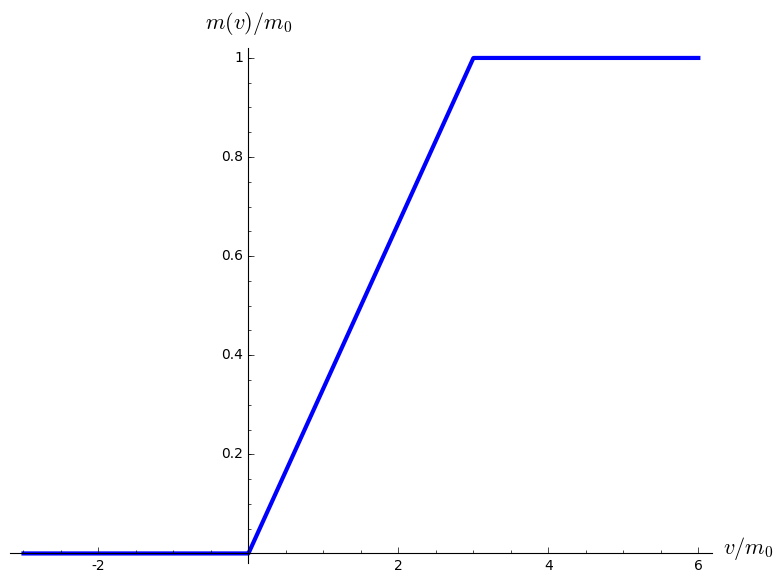

In [24]:
plot(m1(v).subs({m0: 1, v0: 3}), (v,-3, 6), thickness=3,
                axes_labels=[r'$v/m_0$', r'$m(v)/m_0$'])

We plug this function into the expression of $\frac{\mathrm{d}r}{\mathrm{d}t}$ found above:

In [25]:
drdt1 = drdt.substitute_function(m, m1)
drdt1

-(((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + v0) + 1)/v0 + 2*sgn(r + t - v0) + 2)*m0 - 2*r)/(((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + v0) + 1)/v0 + 2*sgn(r + t - v0) + 2)*m0 + 2*r)

and we perform a numerical integration for $v_0 = 3 m_0$

In [26]:
drdt0 = drdt1.subs({m0: 1, v0: 3})
drdt0

-((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) - 6*r + 6*sgn(r + t - 3) + 6)/((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) + 6*r + 6*sgn(r + t - 3) + 6)

In [27]:
outgeods = []
tmax = 4
for t0 in [-6, -5, -4, -3, -2.8, -2.5, -2, -1.5, -1]:
    sol = desolve_rk4(drdt0, r, ivar=t, ics=[t0,0.01], end_points=[t0, tmax], step=0.02)
    outgeods.append(line([[s[1],s[0]] for s in sol if s[1]>0], color='green'))

In [28]:
graph = Graphics()
rmax = 6
nl = 20
for i in range(nl+1):
    t0 = float(i)/float(nl)*3
    graph += line([(0,t0), (rmax, t0-rmax)], color='yellow')

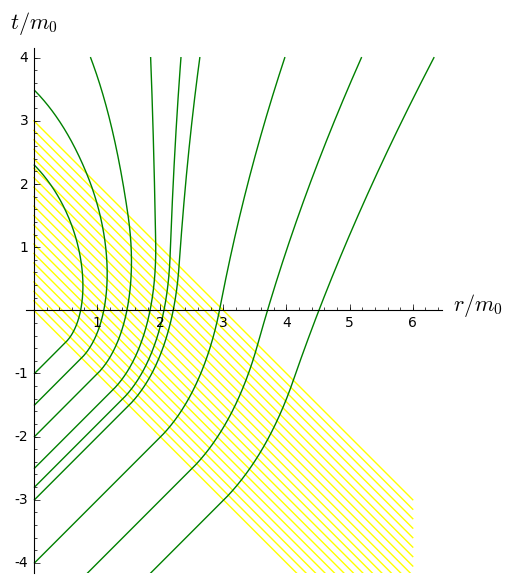

In [29]:
for geod in outgeods:
    graph += geod
show(graph, aspect_ratio=1, ymin=-4, axes_labels=[r'$r/m_0$', r'$t/m_0$'])

The event horizon:

In [30]:
t0 = -2.6
sol = desolve_rk4(drdt0, r, ivar=t, ics=[t0,0.01], end_points=[t0, tmax], step=0.02)
hor = line([[s[1],s[0]] for s in sol if s[1]>0], color='black', thickness=3)
graph += hor

In [31]:
ingeods = []
rmax = 6
for t0 in range(-6, 10):
    ingeods.append(line([(0,t0), (rmax, t0-rmax)], color='green'))
for geod in ingeods:
    graph += geod

The trapping horizon:

In [32]:
trap = line([(0,0), (2,1), (2,tmax)], color='red', thickness=2)
graph += trap

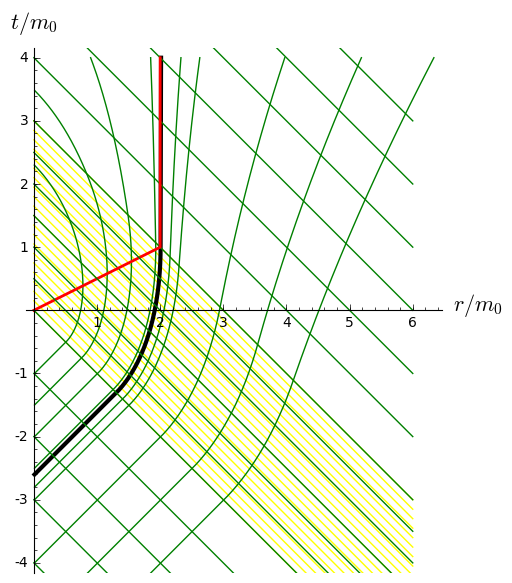

In [33]:
for t0 in [0.5, 1.5, 2.5]:
    graph += line([(0,t0), (rmax, t0-rmax)], color='green')
show(graph, aspect_ratio=1, ymin=-4, ymax=4, axes_labels=[r'$r/m_0$', r'$t/m_0$'])

In [34]:
graph.save("vaidya.pdf", aspect_ratio=1, ymin=-4, ymax=4, 
           axes_labels=[r'$r/m_0$', r'$t/m_0$'])

A zoom on the trapping horizon in its dynamical part: notice that the "outgoing" null geodesics cross it with a vertical tangent, in agreement with the cross-sections of the trapping horizon being marginally trapped surfaces.

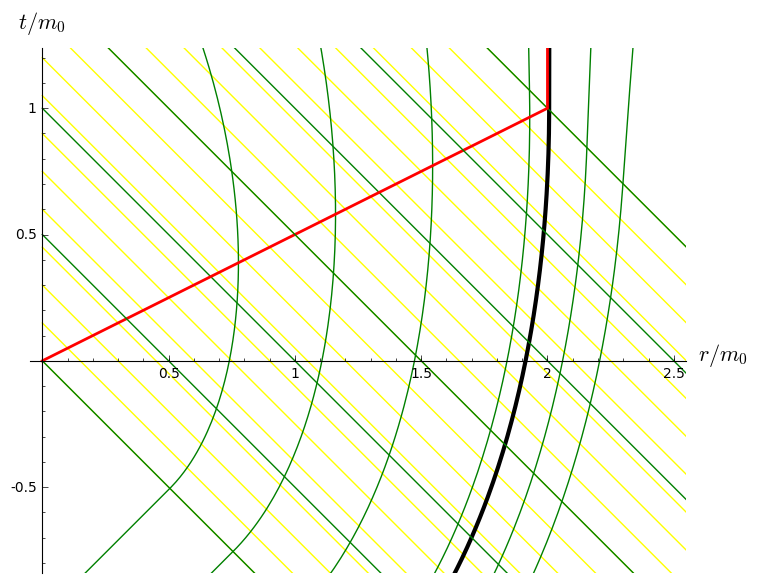

In [35]:
show(graph, aspect_ratio=1, ymin=-0.8, ymax=1.2, xmax=2.5, 
     axes_labels=[r'$r/m_0$', r'$t/m_0$'])